In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings
import PyPDF2
import fitz
import os
from PyPDF2 import PdfFileMerger
import pdfplumber

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

#### all pdf in 1

#### jupyter notebook needs to work in folder that pdfs are in it

In [3]:
%cd D:\DATA_SCIENCE\BOOTCAMP_DERSLER\prototype\reports
%pwd

D:\DATA_SCIENCE\BOOTCAMP_DERSLER\prototype\reports


'D:\\DATA_SCIENCE\\BOOTCAMP_DERSLER\\prototype\\reports'

In [4]:
merger = PdfFileMerger()

In [5]:
for items in os.listdir():
    if items.endswith('.pdf'):
        merger.append(items)

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


In [26]:
merger.write('ALL_TOGETHER.pdf')
merger.close()

RuntimeError: close() was called and thus the writer cannot be used anymore

 #### getting number of total page 

In [67]:
file = open('ALL_TOGETHER.pdf', 'rb')
readpdf = PyPDF2.PdfFileReader(file)
page_ = readpdf.numPages
print('Number of total page is:', page_)

Number of total page is: 1262


 #### converting every sentences of pdf to raw of a csv

In [28]:
file = 'ALL_TOGETHER.pdf'

In [29]:
lines = []

In [30]:
with pdfplumber.open(file) as pdf:
    pages = pdf.pages
    for page in pdf.pages:
        text = page.extract_text()
        for line in text.split('\n'):
            lines.append(line)
            # print(line)

In [31]:
df = pd.DataFrame(lines)
df.to_csv('ALL_TOGETHER.csv')

In [68]:
df.head(10)

,reviewText
0,social research number
1,
2,publication date
3,
4,
5,evaluation vale glamorgan
6,dispersed housing scheme
7,final report
8,
9,maer ddogfen yma hefyd ar gael yn gymraeg


In [35]:
df.shape

(42811, 1)

In [36]:
df.rename(columns={0: "reviewText"}, inplace=True)
df.head()
df['reviewText'][0]

'SOCIAL RESEARCH NUMBER: '

#### Normalizing Case Folding

In [37]:
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'][0]

'social research number: '

#### Punctuations

In [38]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
df['reviewText'][0]

'social research number '

#### Numbers

In [39]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')
df['reviewText'][0]

'social research number '

#### Stopwords

In [40]:
# nltk.download('stopwords')

In [41]:
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText'][0]

'social research number'

#### Tokenization

In [42]:
# nltk.download("punkt")

In [43]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0    [social, research, number]
1                            []
2           [publication, date]
3                            []
4                            []
Name: reviewText, dtype: object

#### Lemmatization

In [44]:
# nltk.download('wordnet')

In [45]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [46]:
df['reviewText'].head(10)

0                       social research number
1                                             
2                             publication date
3                                             
4                                             
5                    evaluation vale glamorgan
6                     dispersed housing scheme
7                                 final report
8                                             
9    maer ddogfen yma hefyd ar gael yn gymraeg
Name: reviewText, dtype: object

#### TEXT VISUALIZATION

#### Wordcloud

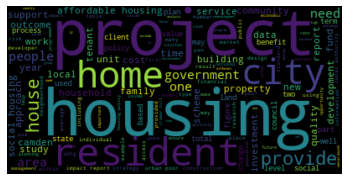

In [48]:
text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

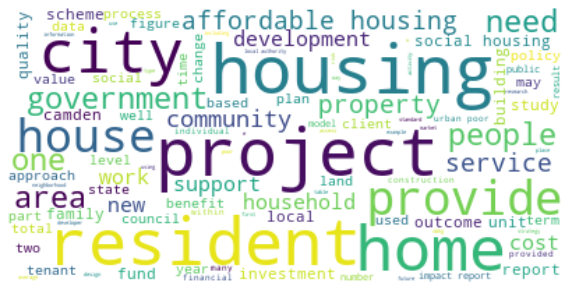

In [57]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Background Image

In [54]:
vbo_mask = np.array(Image.open("syncronic---.png"))

In [55]:
wc = WordCloud(background_color="white",
               max_words=1000,
               mask=vbo_mask,
               contour_width=3,
               contour_color="firebrick")

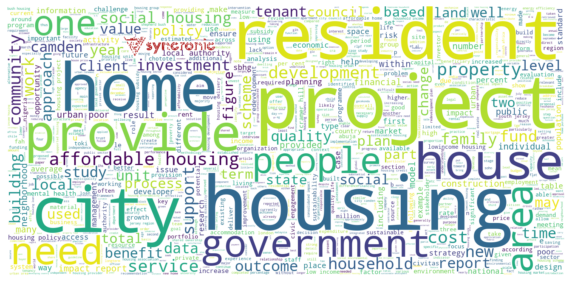

In [56]:
wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wc.to_file("outputs/vbo.png")